# US Company Bankruptcy Detection
Dataset: https://www.kaggle.com/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset

Group 1 members:


1. Chotiros Srisiam #101411914
2. Kajhonprom Trongkitroongruang #101446812
3. Pat Boonprasertsri #101410612
4. Pek Chansatit #101439953
5. Vitchaya Siripoppohn #101481464


# Import libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [ ]:
!gdown 1TyN3LmRarxNtpcyOJNIqjskMplwDEEgU

Downloading...
From: https://drive.google.com/uc?id=1TyN3LmRarxNtpcyOJNIqjskMplwDEEgU
To: /content/american_bankruptcy.csv
100% 11.3M/11.3M [00:00<00:00, 68.6MB/s]


In [ ]:
path = "/content/american_bankruptcy.csv"
df = pd.read_csv(path)

# Inspect the Dataset

Variable Name Description

* X1 Current assets - All the assets of a company that are expected to be sold or used as a result of standard business operations over the next year
* X2 Cost of goods sold - The total amount a company paid as a cost directly related to the sale of products
* X3 Depreciation and amortization - Depreciation refers to the loss of value of a tangible fixed asset over
time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of intangible assets over time.
* X4 EBITDA - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company's overall financial performance, serving as an alternative to net income.
* X5 Inventory - The accounting of items and raw materials that a company either uses in production or sells.
* X6 Net Income - The overall profitability of a company after all expenses and costs have been deducted from total revenue.
* X7 Total Receivables - The balance of money due to a firm for goods or services delivered or used but not yet paid for by customers.
* X8 Market value - The price of an asset in a marketplace. In this dataset, it refers to the market capitalization since companies are publicly traded in the stock market.
* X9 Net sales - The sum of a company's gross sales minus its returns, allowances, and discounts.
* X10 Total assets - All the assets, or items of value, a business owns.
* X11 Total Long-term debt - A company's loans and other liabilities that will not become due within one year of the balance sheet date.
* X12 EBIT - Earnings before interest and taxes.
* X13 Gross Profit - The profit a business makes after subtracting all the costs that are related to manufacturing and selling its products or services.
* X14 Total Current Liabilities - The sum of accounts payable, accrued liabilities, and taxes such as Bonds payable at the end of the year, salaries, and commissions remaining.
* X15 Retained Earnings - The amount of profit a company has left over after paying all its direct costs, indirect costs, income taxes, and its dividends to shareholders.
* X16 Total Revenue - The amount of income that a business has made from all sales before subtracting expenses. It may include interest and dividends from investments.
* X17 Total Liabilities - The combined debts and obligations that the company owes to outside parties.
* X18 Total Operating Expenses - The expenses a business incurs through its normal business operations.

In [ ]:
df.tail()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713
78681,C_8971,alive,2018,82.589,68.817,65.201,67.262,2.112,-50.946,45.839,...,160.513,1625.370,632.122,2.061,91.696,79.365,84.995,160.513,712.687,93.251


In [ ]:
df.describe()

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


In [ ]:
# Find the ratio of our labels

alive_count = df['status_label'].value_counts()['alive']
failed_count = df['status_label'].value_counts()['failed']
total_count = alive_count + failed_count
alive_ratio = alive_count / total_count
failed_ratio = failed_count / total_count

print("Alive Ratio:", alive_ratio)
print("Failed Ratio:", failed_ratio)

Alive Ratio: 0.9336569990595054
Failed Ratio: 0.06634300094049465


* The "Alive Ratio" is approximately 0.934, which means that around 93.4% of the samples in the dataset belong to the "alive" class (e.g., companies that have not failed or gone bankrupt).

* The "Failed Ratio" is approximately 0.066, which means that only about 6.6% of the samples in the dataset belong to the "failed" class (e.g., companies that have experienced bankruptcy or failure).

This significant class imbalance can have implications for building predictive models. When the dataset is highly imbalanced, models may be biased towards the majority class (in this case, "alive") and may not perform well in identifying the minority class (in this case, "failed").

**To address this issue, we consider employing techniques such as:**

* Class Balancing Techniques: Using methods like oversampling the minority class (e.g., Synthetic Minority Over-sampling Technique - SMOTE) or undersampling the majority class to balance the class distribution.

* Algorithm Selection: Choose algorithms that are less sensitive to class imbalance, such as ensemble methods (e.g., Random Forest, Gradient Boosting) or anomaly detection methods.

* Cost-sensitive Learning: Assigning different misclassification costs for each class during model training to reflect the importance of correctly predicting the minority class.

## Finding Outlier

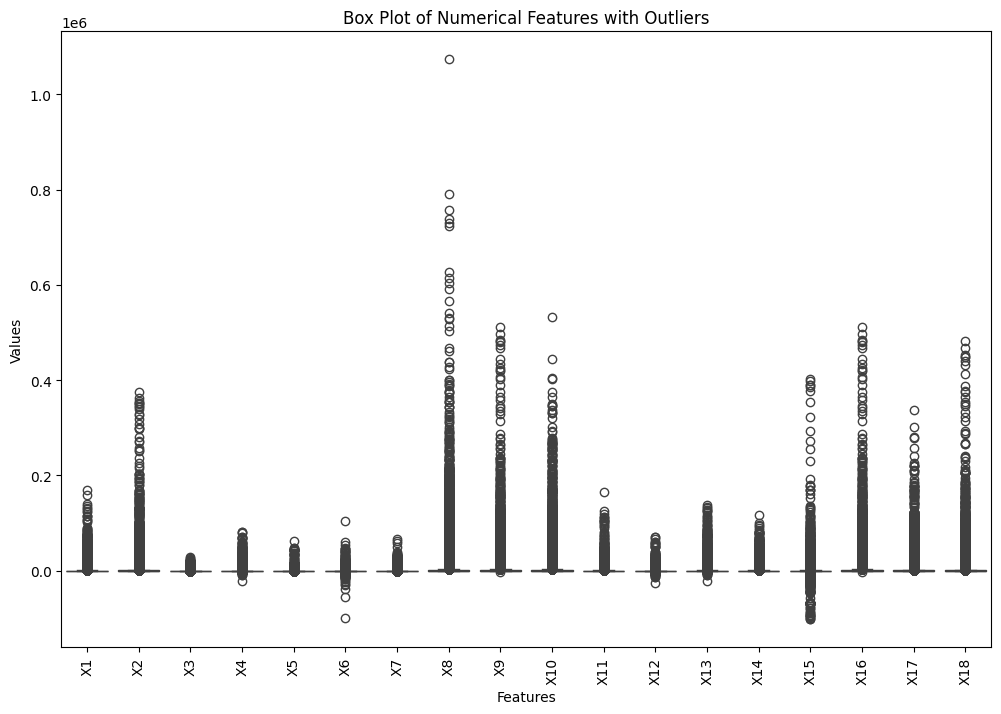

In [ ]:
# Outlier
Q1 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']].quantile(0.25)
Q3 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']] < (Q1 - 1.5 * IQR)) | (df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']] > (Q3 + 1.5 * IQR)))

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features with Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

## Cut off Outlier

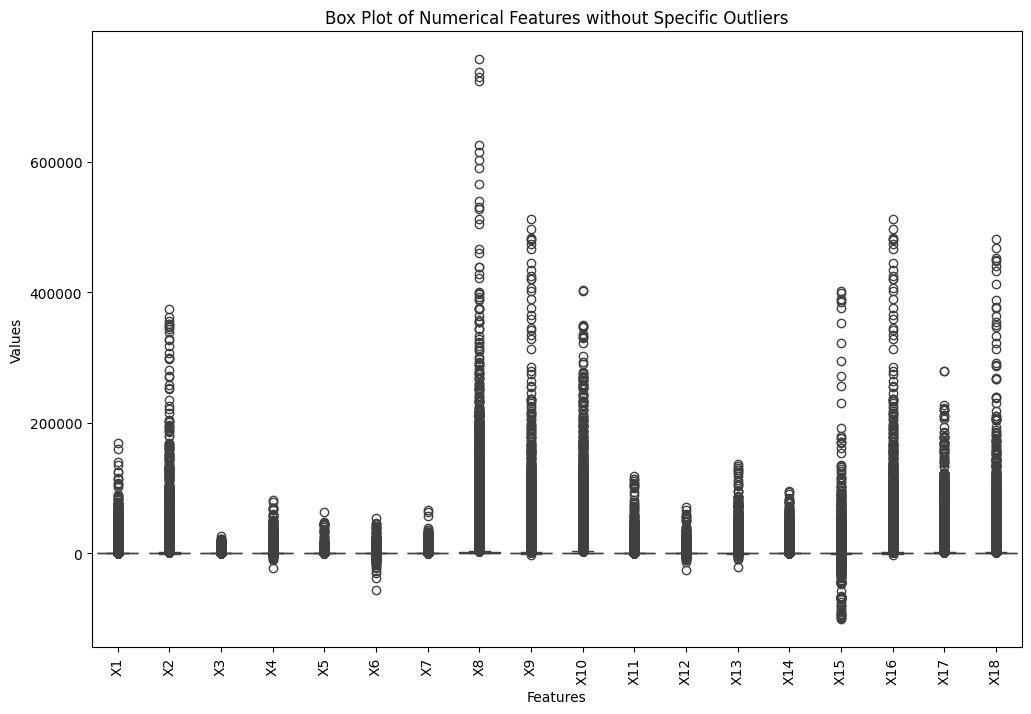

In [ ]:
# Define the rows to be removed by finding the value each features from the outliers from above graph
rows_to_remove = df[((df['company_name'] == 'C_102') | (df['company_name'] == 'C_1452')) & ((df['year'] == 2018) | (df['year'] == 2017)) # X8 and X11 Outlier Positive
                   |((df['company_name'] == 'C_644') & (df['year'] == 2009))| # X6 Outlier Positive
                    ((df['company_name'] == 'C_3532') & (df['year'] == 2002))].index # X6 Outlier Negative

# Remove the specified rows
cleaned_df = df.drop(rows_to_remove)

# Plot boxplot without the specified rows
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features without Specific Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

Dealing with outliers is crucial to ensure that they do not adversely affect the performance of the predictive models. Outliers can skew the distribution of data and impact the model's ability to generalize to unseen data.

**Here are the strategy to handle outliers in the dataset:**
* Remove Outliers: One straightforward approach is to remove the outliers from the dataset. However, this should be done with caution, as outliers may contain valuable information or represent rare but significant events. Removing too many outliers can lead to loss of important data.

## Feature Analysis

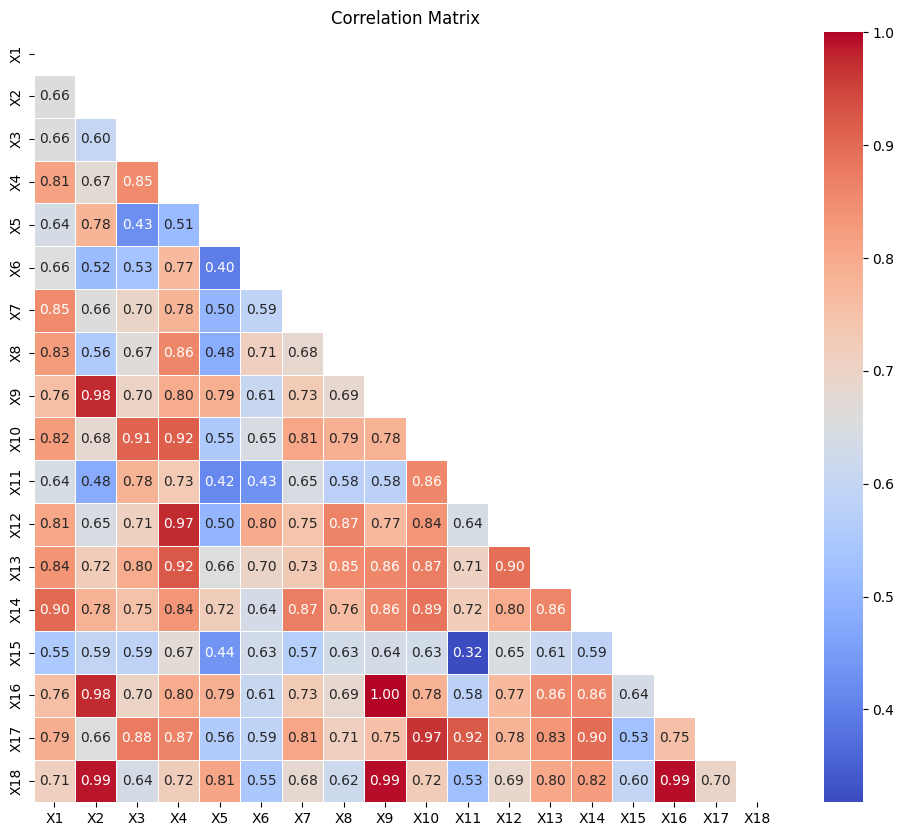

In [ ]:
# Correlation Matrix
variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
data = df[variables]
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Pre-Processing
df['status_label'] = df['status_label'].map({'alive': 0, 'failed': 1})
X = df.drop(columns=['company_name', 'status_label'])
y = df['status_label']

* Convert the categorical target variable 'status_label' to numerical labels (0 for 'alive' and 1 for 'failed').
* Create the feature matrix X, excluding the 'company_name' and 'status_label' columns, to be used for training the machine learning model.
* Set the target variable y as the numerical 'status_label', representing the labels for the training dataset.

After these preprocessing steps, you can proceed with model training using X as the feature matrix and y as the target variable.

# Train Model

In [ ]:
# Select all features
selected_features_rf = ['year','X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
df_rf_selected = df[['status_label'] + selected_features_rf]

print("\nNew dataset with selected features from random forests:")
print(df_rf_selected.head())


New dataset with selected features from random forests:
   status_label  year       X1       X2      X3      X4       X5      X6  \
0             0  1999  511.267  833.107  18.373  89.031  336.018  35.163   
1             0  2000  485.856  713.811  18.577  64.367  320.590  18.531   
2             0  2001  436.656  526.477  22.496  27.207  286.588 -58.939   
3             0  2002  396.412  496.747  27.172  30.745  259.954 -12.410   
4             0  2003  432.204  523.302  26.680  47.491  247.245   3.504   

        X7        X8        X9      X10      X11     X12      X13      X14  \
0  128.348  372.7519  1024.333  740.998  180.447  70.658  191.226  163.816   
1  115.187  377.1180   874.255  701.854  179.987  45.790  160.444  125.392   
2   77.528  364.5928   638.721  710.199  217.699   4.711  112.244  150.464   
3   66.322  143.3295   606.337  686.621  164.658   3.573  109.590  203.575   
4  104.661  308.9071   651.958  709.292  248.666  20.811  128.656  131.261   

       X15       

In [ ]:
df_rf_selected.shape

(78682, 20)

Train Test Split: We split the dataset by concerning the time series event

In [ ]:
# Training set (-2011) 75%
X_rf_train = df.loc[df["year"] <= 2011, df_rf_selected.columns.drop(["status_label"])]
y_rf_train = df.loc[df["year"] <= 2011, "status_label"]

# Validation set I(2012-2014) 13%
X_rf_test = df.loc[df["year"].between(2012, 2014), df_rf_selected.columns.drop(["status_label"])]
y_rf_test = df.loc[df["year"].between(2012, 2014), "status_label"]

# Test set (2015+) 12%
X_val = df.loc[df["year"] >= 2015, df_rf_selected.columns.drop(["status_label"])]
y_val = df.loc[df["year"] >= 2015, "status_label"]

rf_model = RandomForestClassifier(random_state=42)

## Random Forest Model


In [ ]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                            max_features='auto', bootstrap=True, n_jobs=4, random_state=42)

rf.fit(X_rf_train, y_rf_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=200, n_jobs=4,
                       random_state=42)

In [ ]:
pred = rf.predict(X_val)
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11995
           1       0.47      0.05      0.09       287

    accuracy                           0.98     12282
   macro avg       0.72      0.53      0.54     12282
weighted avg       0.97      0.98      0.97     12282

[[11978    17]
 [  272    15]]


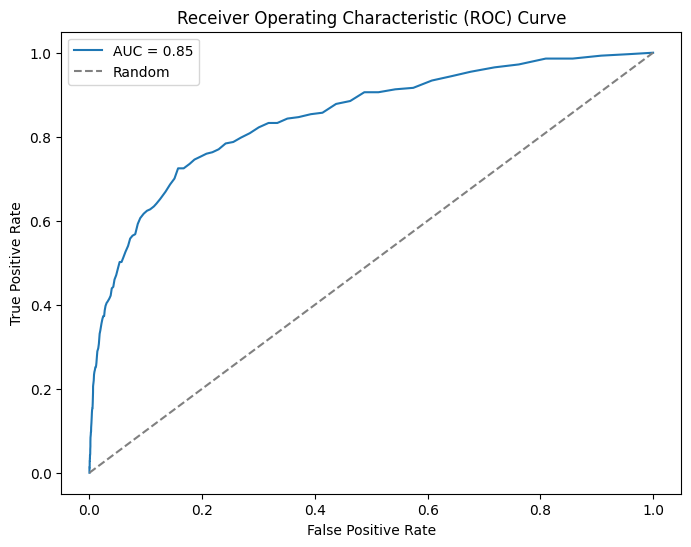

In [ ]:
# Calculate ROC curve and AUC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
probabilities = rf.predict_proba(X_val)[:, 1]  # Assuming it's a binary classification task
fpr, tpr, thresholds = roc_curve(y_val, probabilities)
roc_auc = roc_auc_score(y_val, probabilities)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## XGBoost Model

In [ ]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="reg:logistic", n_estimators = 1000, learning_rate=0.02, subsample=0.8, n_jobs=4, eval_metric="aucpr", early_stopping_rounds=12)

xgb.fit(X_rf_train, y_rf_train, eval_set=[(X_rf_test, y_rf_test)])

[0]	validation_0-aucpr:0.14879
[1]	validation_0-aucpr:0.17706
[2]	validation_0-aucpr:0.18739
[3]	validation_0-aucpr:0.19024
[4]	validation_0-aucpr:0.19434
[5]	validation_0-aucpr:0.19375
[6]	validation_0-aucpr:0.19242
[7]	validation_0-aucpr:0.19371
[8]	validation_0-aucpr:0.18929
[9]	validation_0-aucpr:0.19132
[10]	validation_0-aucpr:0.19487
[11]	validation_0-aucpr:0.19647
[12]	validation_0-aucpr:0.19761
[13]	validation_0-aucpr:0.20214
[14]	validation_0-aucpr:0.20387
[15]	validation_0-aucpr:0.20565
[16]	validation_0-aucpr:0.20942
[17]	validation_0-aucpr:0.21301
[18]	validation_0-aucpr:0.21703
[19]	validation_0-aucpr:0.21536
[20]	validation_0-aucpr:0.21531
[21]	validation_0-aucpr:0.21632
[22]	validation_0-aucpr:0.21904
[23]	validation_0-aucpr:0.22196
[24]	validation_0-aucpr:0.22286
[25]	validation_0-aucpr:0.21865
[26]	validation_0-aucpr:0.22246
[27]	validation_0-aucpr:0.22634
[28]	validation_0-aucpr:0.22498
[29]	validation_0-aucpr:0.22426
[30]	validation_0-aucpr:0.22896
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=12,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=4,
              num_parallel_tree=None, objective='reg:logistic', ...)

In [ ]:
pred = xgb.predict(X_val)
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11995
           1       0.64      0.12      0.20       287

    accuracy                           0.98     12282
   macro avg       0.81      0.56      0.60     12282
weighted avg       0.97      0.98      0.97     12282

[[11975    20]
 [  252    35]]


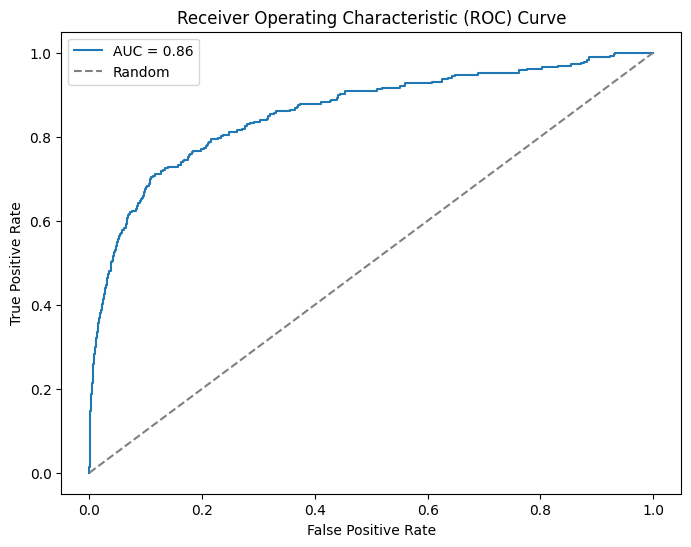

In [ ]:
# Calculate ROC curve and AUC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
probabilities = xgb.predict_proba(X_val)[:, 1]  # Assuming it's a binary classification task
fpr, tpr, thresholds = roc_curve(y_val, probabilities)
roc_auc = roc_auc_score(y_val, probabilities)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Weighted XGBoost for Class Imbalance

In [ ]:
# XGBoost with scale_pos_weight (Weighted XGBoost)
from xgboost import XGBClassifier

xgb = XGBClassifier(objective="reg:logistic", n_estimators=1000, learning_rate=0.02, subsample=0.8, n_jobs=4, eval_metric="aucpr", early_stopping_rounds=12, scale_pos_weight=len(y_rf_train[y_rf_train==0])/len(y_rf_train[y_rf_train==1]))

xgb.fit(X_rf_train, y_rf_train, eval_set=[(X_rf_test, y_rf_test)])

[0]	validation_0-aucpr:0.14924
[1]	validation_0-aucpr:0.16956
[2]	validation_0-aucpr:0.18177
[3]	validation_0-aucpr:0.18399
[4]	validation_0-aucpr:0.18854
[5]	validation_0-aucpr:0.18955
[6]	validation_0-aucpr:0.18900
[7]	validation_0-aucpr:0.19584
[8]	validation_0-aucpr:0.19764
[9]	validation_0-aucpr:0.19656
[10]	validation_0-aucpr:0.19343
[11]	validation_0-aucpr:0.19724
[12]	validation_0-aucpr:0.19677
[13]	validation_0-aucpr:0.19711
[14]	validation_0-aucpr:0.19801
[15]	validation_0-aucpr:0.19922
[16]	validation_0-aucpr:0.20070
[17]	validation_0-aucpr:0.20870
[18]	validation_0-aucpr:0.20996
[19]	validation_0-aucpr:0.20910
[20]	validation_0-aucpr:0.21125
[21]	validation_0-aucpr:0.21173
[22]	validation_0-aucpr:0.21242
[23]	validation_0-aucpr:0.21353
[24]	validation_0-aucpr:0.21559
[25]	validation_0-aucpr:0.21465
[26]	validation_0-aucpr:0.21920
[27]	validation_0-aucpr:0.21892
[28]	validation_0-aucpr:0.21770
[29]	validation_0-aucpr:0.21809
[30]	validation_0-aucpr:0.21793
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=12,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=4,
              num_parallel_tree=None, objective='reg:logistic', ...)

In [ ]:
pred = xgb.predict(X_val)
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     11995
           1       0.10      0.70      0.17       287

    accuracy                           0.84     12282
   macro avg       0.54      0.77      0.54     12282
weighted avg       0.97      0.84      0.89     12282

[[10099  1896]
 [   86   201]]


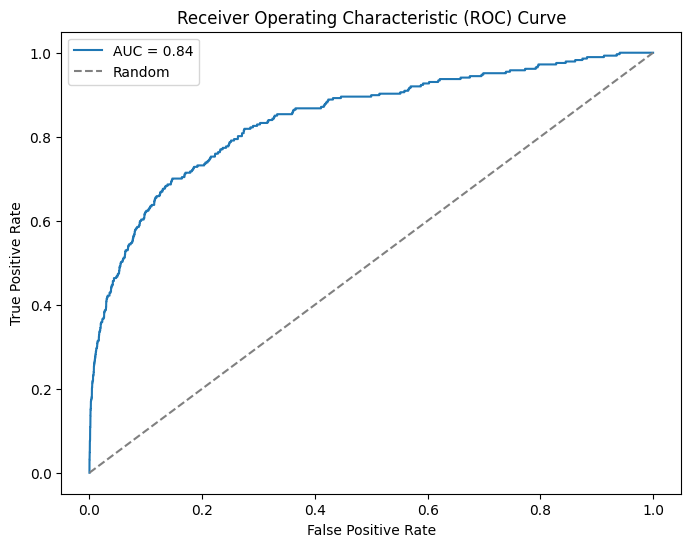

In [ ]:
# Calculate ROC curve and AUC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
probabilities = xgb.predict_proba(X_val)[:, 1]  # Assuming it's a binary classification task
fpr, tpr, thresholds = roc_curve(y_val, probabilities)
roc_auc = roc_auc_score(y_val, probabilities)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
df["year"]

0        1999
1        2000
2        2001
3        2002
4        2003
         ... 
78677    2014
78678    2015
78679    2016
78680    2017
78681    2018
Name: year, Length: 78682, dtype: int64

In [ ]:
#save the result
results_df = pd.DataFrame({'company_name': df.loc[df["year"] >= 2019]['company_name'], 'year': df.loc[df["year"] >= 2019]['year'], 'True_Label': y_val, 'Predicted_Label': pred})
results_df.to_csv('predictions_with_id_xgb_with_weight.csv', index=False)

## Resampling XGBoost for Class Imbalance

In [ ]:
# XGBoost with scale_pos_weight (Weighted XGBoost)
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="reg:logistic", n_estimators = 1000, learning_rate=0.02, subsample=0.8, n_jobs=4, eval_metric="aucpr", early_stopping_rounds=12)

xgb.fit(X_rf_train, y_rf_train, eval_set=[(X_rf_test, y_rf_test)])

[0]	validation_0-aucpr:0.14879
[1]	validation_0-aucpr:0.17706
[2]	validation_0-aucpr:0.18739
[3]	validation_0-aucpr:0.19024
[4]	validation_0-aucpr:0.19434
[5]	validation_0-aucpr:0.19375
[6]	validation_0-aucpr:0.19242
[7]	validation_0-aucpr:0.19371
[8]	validation_0-aucpr:0.18929
[9]	validation_0-aucpr:0.19132
[10]	validation_0-aucpr:0.19487
[11]	validation_0-aucpr:0.19647
[12]	validation_0-aucpr:0.19761
[13]	validation_0-aucpr:0.20214
[14]	validation_0-aucpr:0.20387
[15]	validation_0-aucpr:0.20565
[16]	validation_0-aucpr:0.20942
[17]	validation_0-aucpr:0.21301
[18]	validation_0-aucpr:0.21703
[19]	validation_0-aucpr:0.21536
[20]	validation_0-aucpr:0.21531
[21]	validation_0-aucpr:0.21632
[22]	validation_0-aucpr:0.21904
[23]	validation_0-aucpr:0.22196
[24]	validation_0-aucpr:0.22286
[25]	validation_0-aucpr:0.21865
[26]	validation_0-aucpr:0.22246
[27]	validation_0-aucpr:0.22634
[28]	validation_0-aucpr:0.22498
[29]	validation_0-aucpr:0.22426
[30]	validation_0-aucpr:0.22896
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=12,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=4,
              num_parallel_tree=None, objective='reg:logistic', ...)

In [ ]:
# Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Example of using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_rf_train, y_rf_train = ros.fit_resample(X_rf_train, y_rf_train)

In [ ]:
pred = xgb.predict(X_val)
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11995
           1       0.64      0.12      0.20       287

    accuracy                           0.98     12282
   macro avg       0.81      0.56      0.60     12282
weighted avg       0.97      0.98      0.97     12282

[[11975    20]
 [  252    35]]


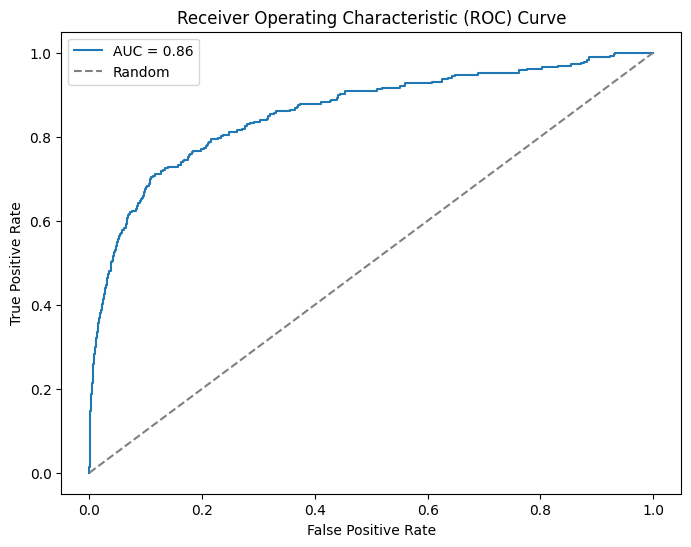

In [ ]:
# Calculate ROC curve and AUC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
probabilities = xgb.predict_proba(X_val)[:, 1]  # Assuming it's a binary classification task
fpr, tpr, thresholds = roc_curve(y_val, probabilities)
roc_auc = roc_auc_score(y_val, probabilities)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Our Chosen Model
Weighted XGBoost

# Showcase
Our Plan


1. Pick bankruptcy firms between 2023-2024
2. Collect historical data (year 2023-)
3. Use our final model to detect abnormal event
4. Repeat with another different firms

In [ ]:
# Showcase Plan
# 1) Pick bankruptcy firms between 2023-2024
# 2) Collect historical data (year 2023-)
# 3) Use our final model to detect abnormal event
# 4) Repeat with another different firms

In [ ]:
path = "/content/american_bankruptcy_with_showcase.csv"
df = pd.read_csv(path)

In [ ]:
df.tail()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
78685,WeWork,alive,2021,1472000.0,3085000.0,709000.0,-3675000.0,0.0,-4439000.0,285000.0,...,2570000.0,21756000.0,2866000.0,-4384000.0,-515000.0,2133000.0,-14143000.0,2570000.0,23169000.0,1879000.0
78686,WeWork,alive,2022,1329228.0,2914000.0,641000.0,-1391000.0,0.0,-2034000.0,173000.0,...,3245000.0,17863000.0,3208000.0,-2032000.0,331000.0,2230000.0,-16177000.0,3245000.0,21318000.0,1497000.0
78687,SmileDirectClub,alive,2020,580776.0,206852.0,56390.0,-173977.0,29247.0,-78366.0,221973.0,...,656780.0,884789.0,381942.0,-230367.0,449928.0,186541.0,-192879.0,656780.0,650651.0,634901.0
78688,SmileDirectClub,alive,2021,467740.0,177597.0,70113.0,-241115.0,40803.0,-102442.0,184558.0,...,637611.0,794558.0,729973.0,-311228.0,460014.0,178240.0,-295321.0,637611.0,928912.0,714019.0
78689,SmileDirectClub,alive,2022,297419.0,142890.0,74395.0,-186139.0,44387.0,-86404.0,143082.0,...,470743.0,597063.0,849379.0,-260534.0,327853.0,116800.0,-381725.0,470743.0,982261.0,569009.0


## Pre-Processing

In [ ]:
# Pre-Processing
df['status_label'] = df['status_label'].map({'alive': 0, 'failed': 1})
X = df.drop(columns=['company_name', 'status_label'])
y = df['status_label']

In [ ]:
# Select all features
selected_features_rf = ['year','X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
df_rf_selected = df[['status_label'] + selected_features_rf]

print("\nNew dataset with selected features from random forests:")
print(df_rf_selected.head())


New dataset with selected features from random forests:
   status_label  year       X1       X2      X3      X4       X5      X6  \
0             0  1999  511.267  833.107  18.373  89.031  336.018  35.163   
1             0  2000  485.856  713.811  18.577  64.367  320.590  18.531   
2             0  2001  436.656  526.477  22.496  27.207  286.588 -58.939   
3             0  2002  396.412  496.747  27.172  30.745  259.954 -12.410   
4             0  2003  432.204  523.302  26.680  47.491  247.245   3.504   

        X7        X8        X9      X10      X11     X12      X13      X14  \
0  128.348  372.7519  1024.333  740.998  180.447  70.658  191.226  163.816   
1  115.187  377.1180   874.255  701.854  179.987  45.790  160.444  125.392   
2   77.528  364.5928   638.721  710.199  217.699   4.711  112.244  150.464   
3   66.322  143.3295   606.337  686.621  164.658   3.573  109.590  203.575   
4  104.661  308.9071   651.958  709.292  248.666  20.811  128.656  131.261   

       X15       

## Train-Test Split

In [ ]:
# Training set (-2011) 75%
X_rf_train = df.loc[df["year"] <= 2011, df_rf_selected.columns.drop(["status_label"])]
y_rf_train = df.loc[df["year"] <= 2011, "status_label"]

# Validation set I(2012-2014) 13%
X_rf_test = df.loc[df["year"].between(2012, 2014), df_rf_selected.columns.drop(["status_label"])]
y_rf_test = df.loc[df["year"].between(2012, 2014), "status_label"]

# Test set (2015+) 12%
X_val = df.loc[df["year"] >= 2019, df_rf_selected.columns.drop(["status_label"])]
y_val = df.loc[df["year"] >= 2019, "status_label"]

rf_model = RandomForestClassifier(random_state=42)

## XGBoost

In [ ]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="reg:logistic", n_estimators = 1000, learning_rate=0.02, subsample=0.8, n_jobs=4, eval_metric="aucpr", early_stopping_rounds=12)

xgb.fit(X_rf_train, y_rf_train, eval_set=[(X_rf_test, y_rf_test)])

[0]	validation_0-aucpr:0.14879
[1]	validation_0-aucpr:0.17706
[2]	validation_0-aucpr:0.18739
[3]	validation_0-aucpr:0.19024
[4]	validation_0-aucpr:0.19434
[5]	validation_0-aucpr:0.19375
[6]	validation_0-aucpr:0.19242
[7]	validation_0-aucpr:0.19371
[8]	validation_0-aucpr:0.18929
[9]	validation_0-aucpr:0.19132
[10]	validation_0-aucpr:0.19487
[11]	validation_0-aucpr:0.19647
[12]	validation_0-aucpr:0.19761
[13]	validation_0-aucpr:0.20214
[14]	validation_0-aucpr:0.20387
[15]	validation_0-aucpr:0.20565
[16]	validation_0-aucpr:0.20942
[17]	validation_0-aucpr:0.21301
[18]	validation_0-aucpr:0.21703
[19]	validation_0-aucpr:0.21536
[20]	validation_0-aucpr:0.21531
[21]	validation_0-aucpr:0.21632
[22]	validation_0-aucpr:0.21904
[23]	validation_0-aucpr:0.22196
[24]	validation_0-aucpr:0.22286
[25]	validation_0-aucpr:0.21865
[26]	validation_0-aucpr:0.22246
[27]	validation_0-aucpr:0.22634
[28]	validation_0-aucpr:0.22498
[29]	validation_0-aucpr:0.22426
[30]	validation_0-aucpr:0.22896
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=12,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=4,
              num_parallel_tree=None, objective='reg:logistic', ...)

In [ ]:
pred = xgb.predict(X_val)
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.00      0.00      0.00         0

    accuracy                           0.50         8
   macro avg       0.50      0.25      0.33         8
weighted avg       1.00      0.50      0.67         8

[[4 4]
 [0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Weighted XGBoost

In [ ]:
# XGBoost with scale_pos_weight (Weighted XGBoost)
from xgboost import XGBClassifier

xgb = XGBClassifier(objective="reg:logistic", n_estimators=1000, learning_rate=0.02, subsample=0.8, n_jobs=4, eval_metric="aucpr", early_stopping_rounds=12, scale_pos_weight=len(y_rf_train[y_rf_train==0])/len(y_rf_train[y_rf_train==1]))

xgb.fit(X_rf_train, y_rf_train, eval_set=[(X_rf_test, y_rf_test)])

[0]	validation_0-aucpr:0.14924
[1]	validation_0-aucpr:0.16956
[2]	validation_0-aucpr:0.18177
[3]	validation_0-aucpr:0.18399
[4]	validation_0-aucpr:0.18854
[5]	validation_0-aucpr:0.18955
[6]	validation_0-aucpr:0.18900
[7]	validation_0-aucpr:0.19584
[8]	validation_0-aucpr:0.19764
[9]	validation_0-aucpr:0.19656
[10]	validation_0-aucpr:0.19343
[11]	validation_0-aucpr:0.19724
[12]	validation_0-aucpr:0.19677
[13]	validation_0-aucpr:0.19711
[14]	validation_0-aucpr:0.19801
[15]	validation_0-aucpr:0.19922
[16]	validation_0-aucpr:0.20070
[17]	validation_0-aucpr:0.20870
[18]	validation_0-aucpr:0.20996
[19]	validation_0-aucpr:0.20910
[20]	validation_0-aucpr:0.21125
[21]	validation_0-aucpr:0.21173
[22]	validation_0-aucpr:0.21242
[23]	validation_0-aucpr:0.21353
[24]	validation_0-aucpr:0.21559
[25]	validation_0-aucpr:0.21465
[26]	validation_0-aucpr:0.21920
[27]	validation_0-aucpr:0.21892
[28]	validation_0-aucpr:0.21770
[29]	validation_0-aucpr:0.21809
[30]	validation_0-aucpr:0.21793
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=12,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=4,
              num_parallel_tree=None, objective='reg:logistic', ...)

## Our Prediction

In [ ]:
pred = xgb.predict(X_val)
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.00      0.00      0.00         0

    accuracy                           0.62         8
   macro avg       0.50      0.31      0.38         8
weighted avg       1.00      0.62      0.77         8

[[5 3]
 [0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Save Result

In [ ]:
# save the result
results_df = pd.DataFrame({'company_name': df.loc[df["year"] >= 2019]['company_name'], 'year': df.loc[df["year"] >= 2019]['year'], 'True_Label': y_val, 'Predicted_Label': pred})
results_df.to_csv('predictions_with_id_xgb_with_weight_test.csv', index=False)

In [ ]:
# XGBoost with scale_pos_weight (Weighted XGBoost)
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="reg:logistic", n_estimators = 1000, learning_rate=0.02, subsample=0.8, n_jobs=4, eval_metric="aucpr", early_stopping_rounds=12)

xgb.fit(X_rf_train, y_rf_train, eval_set=[(X_rf_test, y_rf_test)])

[0]	validation_0-aucpr:0.14879
[1]	validation_0-aucpr:0.17706
[2]	validation_0-aucpr:0.18739
[3]	validation_0-aucpr:0.19024
[4]	validation_0-aucpr:0.19434
[5]	validation_0-aucpr:0.19375
[6]	validation_0-aucpr:0.19242
[7]	validation_0-aucpr:0.19371
[8]	validation_0-aucpr:0.18929
[9]	validation_0-aucpr:0.19132
[10]	validation_0-aucpr:0.19487
[11]	validation_0-aucpr:0.19647
[12]	validation_0-aucpr:0.19761
[13]	validation_0-aucpr:0.20214
[14]	validation_0-aucpr:0.20387
[15]	validation_0-aucpr:0.20565
[16]	validation_0-aucpr:0.20942
[17]	validation_0-aucpr:0.21301
[18]	validation_0-aucpr:0.21703
[19]	validation_0-aucpr:0.21536
[20]	validation_0-aucpr:0.21531
[21]	validation_0-aucpr:0.21632
[22]	validation_0-aucpr:0.21904
[23]	validation_0-aucpr:0.22196
[24]	validation_0-aucpr:0.22286
[25]	validation_0-aucpr:0.21865
[26]	validation_0-aucpr:0.22246
[27]	validation_0-aucpr:0.22634
[28]	validation_0-aucpr:0.22498
[29]	validation_0-aucpr:0.22426
[30]	validation_0-aucpr:0.22896
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=12,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=4,
              num_parallel_tree=None, objective='reg:logistic', ...)

In [ ]:
pred = xgb.predict(X_val)
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.00      0.00      0.00         0

    accuracy                           0.50         8
   macro avg       0.50      0.25      0.33         8
weighted avg       1.00      0.50      0.67         8

[[4 4]
 [0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
